In [1]:
import torch
import pandas as pd
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

IMDB Real node features

In [2]:
real_feature_path = '../features/imdb/real_node_features15.pt'
real_class_path = '../features/imdb/real_node_class15.pt'
syn_feature_path = '../features/imdb/sync131870233442/sync131870233442_node_features15.pt'
syn_class_path = '../features/imdb/sync131870233442/sync131870233442_node_class15.pt'

In [3]:
def apply_threshold(df):
    return df.applymap(lambda x: 0.0 if x<0.0 else 1.0)

In [4]:
def cosine_sim(original,sampled):
    return cosine_similarity(np.array(original), np.array(sampled))

In [5]:
node_feature_real = torch.load(real_feature_path).detach().numpy()
node_feature_real.shape

(15, 3066)

In [6]:
df_real = pd.DataFrame(node_feature_real)
node_class_real = torch.load(real_class_path).detach().numpy()
node_class_real

array([0, 1, 1, 2, 1, 2, 1, 1, 0, 1, 2, 2, 2, 2, 2])

In [7]:
df_real['class'] = node_class_real

In [8]:
node_feature_syn = torch.load(syn_feature_path).detach().numpy()
node_feature_syn.shape

(15, 3066)

In [9]:
node_class_syn = torch.load(syn_class_path).detach().numpy()
node_class_syn

array([2, 0, 2, 2, 1, 1, 1, 1, 0, 0, 1, 2, 2, 2, 1])

In [10]:
df_syn = pd.DataFrame(node_feature_syn)
df_syn['class'] = node_class_syn

In [11]:
class1_real = df_real[df_real['class'] == 1].drop(['class'], axis = 1)
class1_real

,0,1,2,3,4,5,6,7,8,9,...,3056,3057,3058,3059,3060,3061,3062,3063,3064,3065
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
class1_syn = df_syn[df_syn['class'] == 1].drop(['class'], axis = 1)
class1_syn_discrete = apply_threshold(class1_syn)
class1_syn_discrete

,0,1,2,3,4,5,6,7,8,9,...,3056,3057,3058,3059,3060,3061,3062,3063,3064,3065
4,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
6,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
7,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
10,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
14,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0


In [13]:
sns.set(font_scale=1.4)

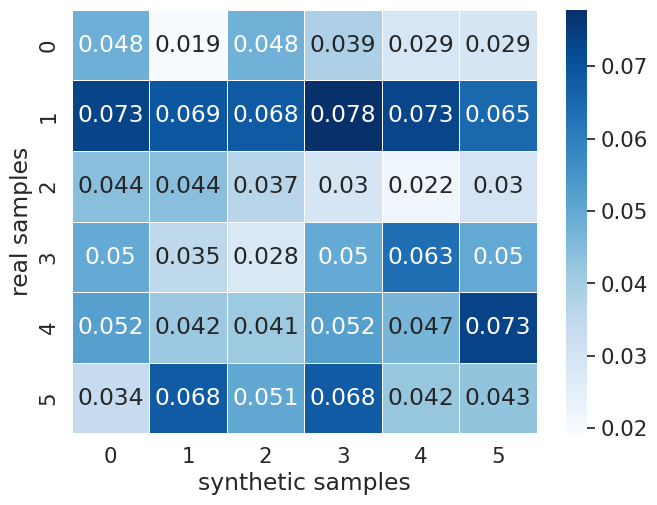

In [14]:
fig, ax = plt.subplots(figsize=(7.5,5.5)) 
sns.heatmap(cosine_sim(class1_real,class1_syn_discrete), 
            xticklabels = 1, yticklabels = 1,annot =True, cmap='Blues', linewidth=.5)
plt.xlabel("synthetic samples") 
plt.ylabel("real samples") 
plt.show()

In [15]:
def plot_graph(G,classes):

    color_class_map = {0: 'blue', 1: 'red', 2: 'darkgreen'}

    nx.set_node_attributes(G, dict(zip(G.nodes(), classes)), 'class')

    nx.draw(G, 
        with_labels=True, node_color=[color_class_map[node[1]['class']] 
                        for node in G.nodes(data=True)], 
            #node_size=800,
        font_color='white')
    plt.show()

In [16]:
plt.rcParams.update({'axes.ymargin': 0.2})

In [17]:
def plot_node_type_dist(classes):
    fig, ax = plt.subplots()
    
    bins = np.arange(4) - 0.5

    colors = ['royalblue','red','green']

    cnts, values, bars = ax.hist(classes, edgecolor='w', bins=bins, rwidth=0.2)

    for i, (cnt, value, bar) in enumerate(zip(cnts, values, bars)):
        bar.set_facecolor(colors[i % len(colors)])

 
    plt.xticks([0,1,2],fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlim([-1, 3])
    plt.show()

In [18]:
plt.rcParams.update({'axes.ymargin': 0.2})

In [19]:
def compare_plot_node_type_dist(df):
    df_new = df.apply(pd.value_counts).T
    color=['blue','red','darkgreen','orange']
    ax=df_new.plot.bar(width=0.2,figsize=(7,7),color=color)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
#     for i in ax.containers:
#         ax.bar_label(i,fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    
    plt.legend(fontsize="20", loc ="lower center")
    plt.ylabel('no. of nodes',fontsize=20)
    plt.tight_layout()
    plt.show();

In [20]:
G_real = nx.read_gexf('../features/imdb/real_G15.gexf')

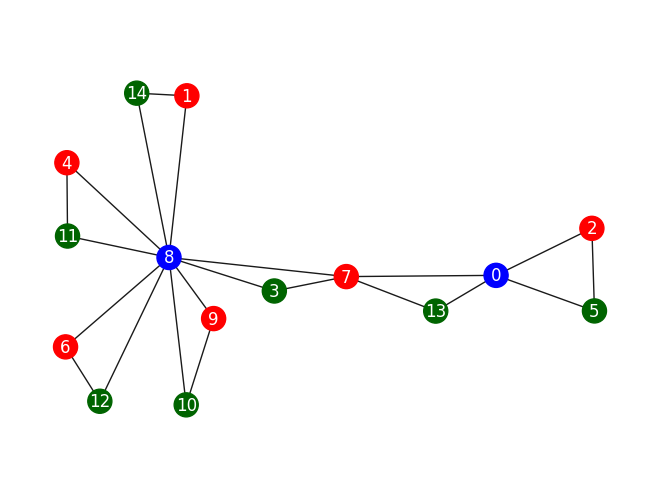

In [21]:
plot_graph(G_real,node_class_real)

In [22]:
G_syn = nx.read_gexf('../features/imdb/sync131870233442/sync131870233442_G15.gexf')

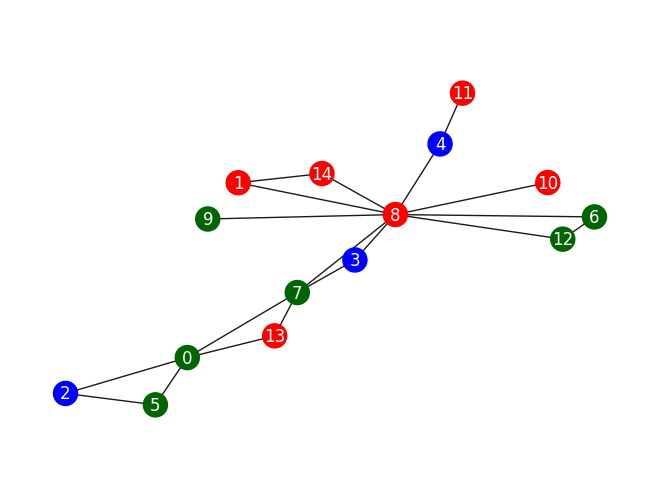

In [23]:
plot_graph(G_syn,node_class_syn)

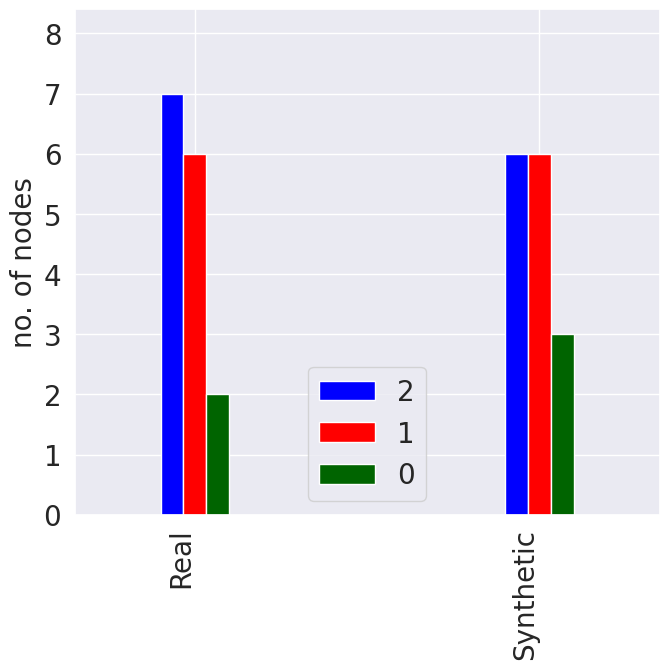

In [24]:
df_compare = pd.DataFrame()
df_compare['Real'] = list(node_class_real)
df_compare['Synthetic'] = list(node_class_syn)
compare_plot_node_type_dist(df_compare)